In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as ss

In [2]:
mu = 2
sig = 1

#### Intuition
The CDF is the percentile function, telling you what proportion of the class you scored higher than.

Percentiles themselves are spread uniformly. There's the same number of people who have percentiles in the 70's as percentile's in the 80's. There's the same number of people in the top 5% of the class as in the bottom 5% in the class.

The random variable here is a random test score from the class. If we plug in a random test score into the percentile function, we get a uniformly random percentile between 0 and 100. This is true regardless of what weird distribution the test scores come from.

See original [post](https://www.quora.com/What-is-an-intuitive-explanation-of-the-Probability-Integral-Transform-aka-Universality-of-the-Uniform)

#### Use simulated CDF

In [3]:
normal = np.random.normal(mu, sig, 1000)

In [4]:
def cdf(x):
    return sum(normal <= x) / len(normal)

In [5]:
xs = np.linspace(-5, 5, 50)
y_cdf = ss.norm.cdf(xs, mu, sig) # the normal cdf

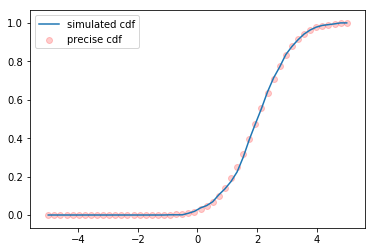

In [6]:
plt.plot(xs, [cdf(x) for x in xs], label='simulated cdf')
plt.scatter(xs, y_cdf, color='r', alpha=0.2, marker='o', label='precise cdf')

plt.legend()

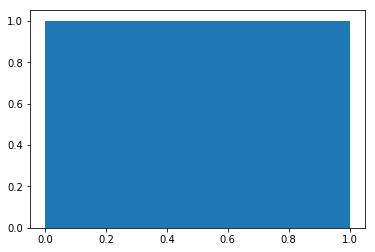

In [7]:
# plug the same normal sample we used to approximate cdf, we get exactly uniform distribution
plt.hist([cdf(x) for x in normal], density=True)
plt.show()

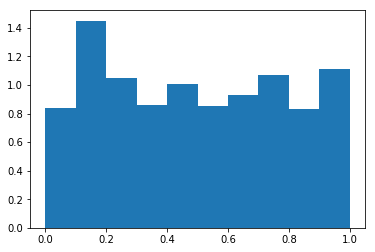

In [8]:
# use another normal sample, we get some noise
normal_sample = np.random.normal(mu, sig, 1000)
plt.hist([cdf(x) for x in normal_sample], density=True)
plt.show()

(array([0.010204, 0.010535, 0.009868, 0.010436, 0.009984, 0.010556,
        0.010429, 0.009304, 0.009711, 0.008973]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

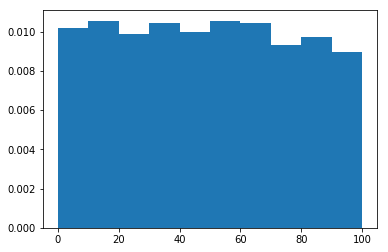

In [9]:
# a faster way is to use scipy, so we can use larger sample
normal = np.random.normal(mu, sig, 5000)
normal_sample = np.random.normal(mu, sig, 100000)
plt.hist([ss.percentileofscore(normal, x) for x in normal_sample], density=True)

##### Use precise CDF

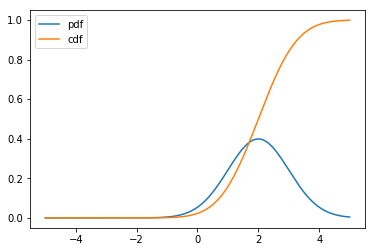

In [10]:
x = np.linspace(-5, 5, 5000)

y_pdf = ss.norm.pdf(x, mu, sig) # the normal pdf
y_cdf = ss.norm.cdf(x, mu, sig) # the normal cdf

plt.plot(x, y_pdf, label='pdf')
plt.plot(x, y_cdf, label='cdf')
plt.legend();

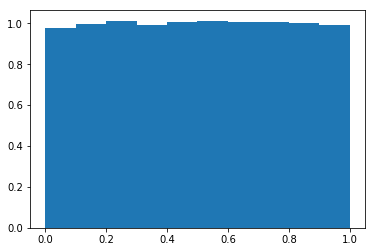

In [11]:
# plug a normal sample into analytical cdf, we get normal distribution
normal_sample = np.random.normal(mu, sig, 100000)
inverted = ss.norm.cdf(normal_sample, mu, sig)

plt.hist(inverted, density=True)
plt.show()